# Pycaret

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse, make_scorer
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

from pycaret.regression import *

In [2]:
df_train = pd.read_csv("data/train_clean.csv")
df_test = pd.read_csv("data/test_clean.csv")

In [3]:
df_train[["cut", "color", "clarity"]] = df_train[["cut", "color", "clarity"]].apply(lambda x:x.astype("float64"))

In [4]:
df_train.dtypes

carat      float64
cut        float64
color      float64
clarity    float64
depth      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [5]:
exp_clf101 = setup(data = df_train, target = "price", session_id=123)

,Description,Value
0,session_id,123
1,Target,price
2,Original Data,"(40455, 9)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(28318, 8)"


In [6]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.0665,0.0084,0.0918,0.9918,0.0105,0.0086,0.2650
et,Extra Trees Regressor,0.0684,0.0092,0.0958,0.9910,0.0110,0.0089,4.0840
rf,Random Forest Regressor,0.0677,0.0093,0.0963,0.9909,0.0110,0.0088,3.9400
gbr,Gradient Boosting Regressor,0.0829,0.0118,0.1085,0.9885,0.0127,0.0110,1.4910
dt,Decision Tree Regressor,0.0898,0.0171,0.1307,0.9833,0.0149,0.0116,0.0690
knn,K Neighbors Regressor,0.1067,0.0214,0.1463,0.9791,0.0171,0.0141,0.0900
ada,AdaBoost Regressor,0.1569,0.0391,0.1978,0.9619,0.0232,0.0207,1.4330
huber,Huber Regressor,0.1242,0.0720,0.2433,0.9301,0.0294,0.0161,0.3190
par,Passive Aggressive Regressor,0.1759,0.0873,0.2784,0.9155,0.0314,0.0231,0.0380
ridge,Ridge Regression,0.1292,0.0928,0.2546,0.9104,0.0294,0.0167,0.0150


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [7]:
lgbm_reg = create_model("lightgbm")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0682,0.0089,0.0942,0.9914,0.0108,0.0088
1,0.0669,0.0083,0.0914,0.9917,0.0104,0.0086
2,0.0662,0.0080,0.0897,0.9922,0.0102,0.0085
3,0.0662,0.0080,0.0892,0.9924,0.0101,0.0086
4,0.0651,0.0081,0.0901,0.9922,0.0103,0.0084
5,0.0660,0.0081,0.0899,0.9921,0.0103,0.0086
6,0.0660,0.0084,0.0915,0.9919,0.0104,0.0086
7,0.0660,0.0078,0.0880,0.9926,0.0101,0.0086
8,0.0681,0.0102,0.1011,0.9896,0.0115,0.0088
9,0.0667,0.0086,0.0927,0.9915,0.0107,0.0087


In [8]:
tuned_lgbm = tune_model(lgbm_reg)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0827,0.0136,0.1167,0.9868,0.0135,0.0109
1,0.0822,0.0115,0.1070,0.9886,0.0124,0.0108
2,0.0812,0.0115,0.1070,0.9888,0.0125,0.0107
3,0.0805,0.0109,0.1043,0.9896,0.0122,0.0106
4,0.0795,0.0110,0.1050,0.9894,0.0122,0.0105
5,0.0811,0.0112,0.1056,0.9891,0.0124,0.0107
6,0.0816,0.0116,0.1077,0.9888,0.0125,0.0108
7,0.0793,0.0104,0.1019,0.9901,0.0120,0.0105
8,0.0836,0.0163,0.1275,0.9835,0.0147,0.0110
9,0.0813,0.0119,0.1089,0.9883,0.0128,0.0108


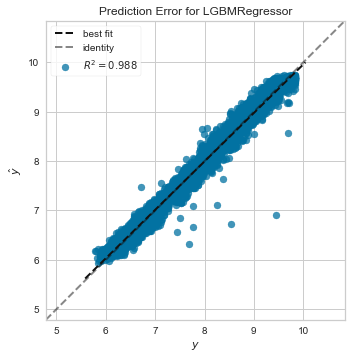

In [9]:
plot_model(tuned_lgbm, plot = "error")

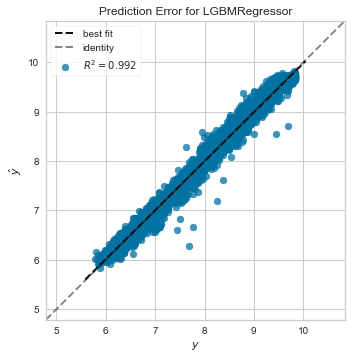

In [10]:
plot_model(lgbm_reg, plot = "error")

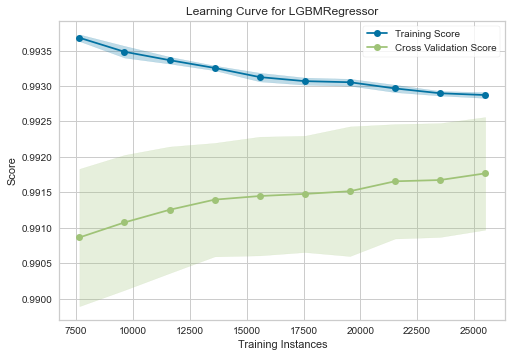

In [11]:
plot_model(lgbm_reg, plot = "learning")

In [12]:
predict_model(lgbm_reg);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0665,0.0087,0.0931,0.9916,0.0106,0.0086


In [13]:
final_lgbm = finalize_model(lgbm_reg)

In [14]:
final_lgbm

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [15]:
predict_model(final_lgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0637,0.0078,0.0881,0.9925,0.0101,0.0082


In [16]:
final_pred = final_lgbm.predict(df_test)

In [17]:
test = pd.DataFrame(df_test.index, columns=["id"])
test["price"] = final_pred
#display in a dataframe

In [18]:
test

,id,price
0,0,7.041240
1,1,8.379998
2,2,7.623003
3,3,8.536960
4,4,9.562312
...,...,...
13480,13480,8.470822
13481,13481,6.464023
13482,13482,6.621876
13483,13483,6.740971


In [19]:
test.to_csv("output/Pycaret.csv", index = False, header = True)